In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/FDM MINI PROJECT/Data Preprocessing/

/content/drive/.shortcut-targets-by-id/1VOsnUh2YwiyJC0mAd6l0oM31b2bNe5GQ/FDM MINI PROJECT/Data Preprocessing


In [ ]:
#imports

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#label encoding
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
print(os.getcwd())
print(os.listdir())

/content/drive/.shortcut-targets-by-id/1VOsnUh2YwiyJC0mAd6l0oM31b2bNe5GQ/FDM MINI PROJECT/Data Preprocessing
['Raw_hotel_bookings.csv', 'Copy of DataPreProcessing2.ipynb', 'Cleaned_hotel_bookings.csv', 'DataPreProcessing2 (1).ipynb', 'DataPreProcessing.ipynb', 'Final_hotel_bookings.csv', 'Copy of DataPreProcessing_Aruna.ipynb', 'DataPreProcessing_Aruna.ipynb']


In [ ]:
DF = pd.read_csv(os.getcwd() + '/Cleaned_hotel_bookings.csv')

#drop additional index column
DF.drop(columns = DF.columns[0], axis = 1, inplace= True)
DF.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  City Hotel            0          6               2015               July   
1  City Hotel            1         88               2015               July   
2  City Hotel            1         65               2015               July   
3  City Hotel            1         92               2015               July   
4  City Hotel            1        100               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          2   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     2       1  ...   
1                        0                     4       2  ...   
2                        0                     4       1  ...   
3                        2                     4       2  ...   
4                        0                     2       2  ...   

   booking_changes  deposit_type agent days_in_waiting_list customer_type  \
0                0    No Deposit     6                    0     Transient   
1                0    No Deposit     9                    0     Transient   
2                0    No Deposit     9                    0     Transient   
3                0    No Deposit     9                    0     Transient   
4                0    No Deposit     9                    0     Transient   

    adr  required_car_parking_spaces  total_of_special_requests  \
0   0.0                            0                          0   
1  76.5                            0                          1   
2  68.0                            0                          1   
3  76.5                            0                          2   
4  76.5                            0                          1   

   reservation_status reservation_status_date  
0           Check-Out                7/3/2015  
1            Canceled                7/1/2015  
2            Canceled               4/30/2015  
3            Canceled               6/23/2015  
4            Canceled                4/2/2015  

[5 rows x 31 columns]

In [ ]:
DF['is_canceled'].isnull().unique()

array([False])

In [ ]:
# removing tuples which are null 
DF = DF.drop(DF[DF['is_canceled'].isnull()].index)

In [ ]:
#lead time -- Min_Max Normalization 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Compute the minimum and maximum to be used for later scaling.

scaler.fit(DF[['lead_time']])

# Scale features of lead_time according to feature_range and store into the DF
DF['lead_time']  = scaler.transform(DF[['lead_time']])


In [ ]:
DF['Is_Same_Room'] =( DF['reserved_room_type'].str.lower().str.replace('s/+',"") == DF['assigned_room_type'].str.lower().str.replace('s/+',"") )
DF['Is_Same_Room'].unique()
DF = DF.drop(columns=['reserved_room_type','assigned_room_type'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
DF['agent']

0          6
1          9
2          9
3          9
4          9
        ... 
79325    394
79326      9
79327      9
79328     89
79329      9
Name: agent, Length: 79330, dtype: int64

In [ ]:
#DF['agent'] = DF['agent'].apply(lambda x: 'False' if pd.isnull(x) else 'True')
DF['agent']= DF['agent'].fillna(-1)

In [ ]:
DF[['agent','lead_time','Is_Same_Room']]

agent  lead_time  Is_Same_Room
0          6   0.009539          True
1          9   0.139905          True
2          9   0.103339          True
3          9   0.146264          True
4          9   0.158983          True
...      ...        ...           ...
79325    394   0.036566          True
79326      9   0.162162          True
79327      9   0.054054          True
79328     89   0.173291          True
79329      9   0.325914          True

[79330 rows x 3 columns]

In [ ]:
#dropping seasonal columns and other uneeded columns
DF = DF.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'reservation_status', 'reservation_status_date'])
DF = DF.drop(columns=['hotel'])
DF.head()

is_canceled  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
0            0   0.009539                        0                     2   
1            1   0.139905                        0                     4   
2            1   0.103339                        0                     4   
3            1   0.146264                        2                     4   
4            1   0.158983                        0                     2   

   adults  children  babies meal country market_segment  ...  \
0       1         0       0   HB     PRT  Offline TA/TO  ...   
1       2         0       0   BB     PRT      Online TA  ...   
2       1         0       0   BB     PRT      Online TA  ...   
3       2         0       0   BB     PRT      Online TA  ...   
4       2         0       0   BB     PRT      Online TA  ...   

  previous_bookings_not_canceled  booking_changes  deposit_type  agent  \
0                              0                0    No Deposit      6   
1                              0                0    No Deposit      9   
2                              0                0    No Deposit      9   
3                              0                0    No Deposit      9   
4                              0                0    No Deposit      9   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient  76.5                            0   
2                     0     Transient  68.0                            0   
3                     0     Transient  76.5                            0   
4                     0     Transient  76.5                            0   

  total_of_special_requests  Is_Same_Room  
0                         0          True  
1                         1          True  
2                         1          True  
3                         2          True  
4                         1          True  

[5 rows x 23 columns]

#Correlation

In [ ]:
corr = DF.corr()['is_canceled']
#print(corr.sort())
corr1 = corr.sort_values()
corr1

total_of_special_requests        -0.293889
booking_changes                  -0.149500
required_car_parking_spaces      -0.133096
is_repeated_guest                -0.065840
previous_bookings_not_canceled   -0.053134
babies                           -0.030186
children                         -0.027089
adr                              -0.011965
stays_in_weekend_nights          -0.007343
agent                             0.011991
stays_in_week_nights              0.048704
adults                            0.053054
days_in_waiting_list              0.060965
previous_cancellations            0.166643
Is_Same_Room                      0.229972
lead_time                         0.309242
is_canceled                       1.000000
Name: is_canceled, dtype: float64

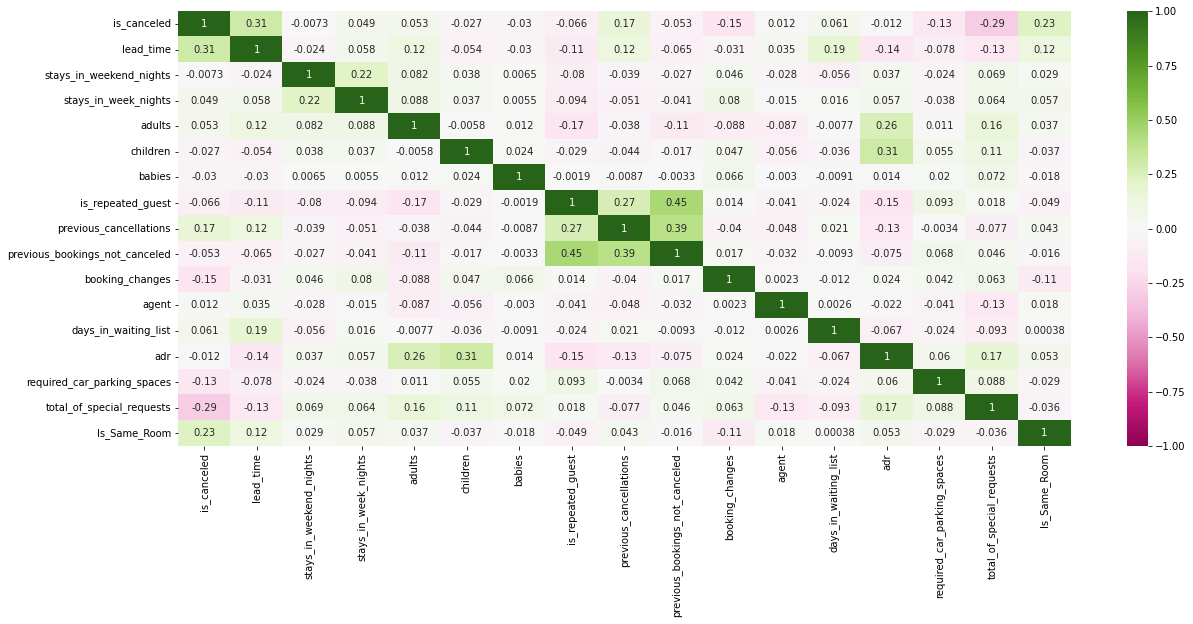

In [ ]:
plt.figure(figsize=(20,8))
#sns.heatmap(DF.corr(),annot=True,cmap='RdYlGn')
sns.heatmap(DF.corr(), annot=True, center=0, vmin=-1, vmax=1, cmap="PiYG")

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79330 entries, 0 to 79329
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     79330 non-null  int64  
 1   lead_time                       79330 non-null  float64
 2   stays_in_weekend_nights         79330 non-null  int64  
 3   stays_in_week_nights            79330 non-null  int64  
 4   adults                          79330 non-null  int64  
 5   children                        79330 non-null  int64  
 6   babies                          79330 non-null  int64  
 7   meal                            79330 non-null  object 
 8   country                         79330 non-null  object 
 9   market_segment                  79330 non-null  object 
 10  distribution_channel            79330 non-null  object 
 11  is_repeated_guest               79330 non-null  int64  
 12  previous_cancellations          

In [ ]:
pd.set_option('display.max_columns', None)
DF.head()

is_canceled  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
0            0   0.009539                        0                     2   
1            1   0.139905                        0                     4   
2            1   0.103339                        0                     4   
3            1   0.146264                        2                     4   
4            1   0.158983                        0                     2   

   adults  children  babies meal country market_segment distribution_channel  \
0       1         0       0   HB     PRT  Offline TA/TO                TA/TO   
1       2         0       0   BB     PRT      Online TA                TA/TO   
2       1         0       0   BB     PRT      Online TA                TA/TO   
3       2         0       0   BB     PRT      Online TA                TA/TO   
4       2         0       0   BB     PRT      Online TA                TA/TO   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   booking_changes deposit_type  agent  days_in_waiting_list customer_type  \
0                0   No Deposit      6                     0     Transient   
1                0   No Deposit      9                     0     Transient   
2                0   No Deposit      9                     0     Transient   
3                0   No Deposit      9                     0     Transient   
4                0   No Deposit      9                     0     Transient   

    adr  required_car_parking_spaces  total_of_special_requests  Is_Same_Room  
0   0.0                            0                          0          True  
1  76.5                            0                          1          True  
2  68.0                            0                          1          True  
3  76.5                            0                          2          True  
4  76.5                            0                          1          True

#Converting categorical to numerical data using label encoding

In [ ]:
DF2 = DF.copy()
DF2.head()

is_canceled  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
0            0   0.009539                        0                     2   
1            1   0.139905                        0                     4   
2            1   0.103339                        0                     4   
3            1   0.146264                        2                     4   
4            1   0.158983                        0                     2   

   adults  children  babies meal country market_segment distribution_channel  \
0       1         0       0   HB     PRT  Offline TA/TO                TA/TO   
1       2         0       0   BB     PRT      Online TA                TA/TO   
2       1         0       0   BB     PRT      Online TA                TA/TO   
3       2         0       0   BB     PRT      Online TA                TA/TO   
4       2         0       0   BB     PRT      Online TA                TA/TO   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   booking_changes deposit_type  agent  days_in_waiting_list customer_type  \
0                0   No Deposit      6                     0     Transient   
1                0   No Deposit      9                     0     Transient   
2                0   No Deposit      9                     0     Transient   
3                0   No Deposit      9                     0     Transient   
4                0   No Deposit      9                     0     Transient   

    adr  required_car_parking_spaces  total_of_special_requests  Is_Same_Room  
0   0.0                            0                          0          True  
1  76.5                            0                          1          True  
2  68.0                            0                          1          True  
3  76.5                            0                          2          True  
4  76.5                            0                          1          True

In [ ]:
DF2 = DF2.drop(columns=['country'])

In [ ]:
#from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

#create function
def label_encoding(columns):

  for column in columns:
    # Using .fit_transform function to fit label
    # encoder and return encoded label
    label = le.fit_transform(DF2[column])

    #finding unique values in label
    x = np.array(label)

    #printing label
    print(f"column name: {column}")
    print(f"label: {label}")
    print(f"unique values: {np.unique(x)}")
    print()

    #update categorical data with numerical data
    DF2[column] = label


In [ ]:
columns = ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'Is_Same_Room']
label_encoding(columns)

column name: meal
label: [2 0 0 ... 0 0 2]
unique values: [0 1 2 3]

column name: market_segment
label: [5 6 6 ... 6 6 6]
unique values: [0 1 2 3 4 5 6 7]

column name: distribution_channel
label: [3 3 3 ... 3 3 3]
unique values: [0 1 2 3 4]

column name: deposit_type
label: [0 0 0 ... 0 0 0]
unique values: [0 1 2]

column name: customer_type
label: [2 2 2 ... 2 2 2]
unique values: [0 1 2 3]

column name: Is_Same_Room
label: [1 1 1 ... 1 1 1]
unique values: [0 1]



In [ ]:
DF2.head()

is_canceled  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
0            0   0.009539                        0                     2   
1            1   0.139905                        0                     4   
2            1   0.103339                        0                     4   
3            1   0.146264                        2                     4   
4            1   0.158983                        0                     2   

   adults  children  babies  meal  market_segment  distribution_channel  \
0       1         0       0     2               5                     3   
1       2         0       0     0               6                     3   
2       1         0       0     0               6                     3   
3       2         0       0     0               6                     3   
4       2         0       0     0               6                     3   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   booking_changes  deposit_type  agent  days_in_waiting_list  customer_type  \
0                0             0      6                     0              2   
1                0             0      9                     0              2   
2                0             0      9                     0              2   
3                0             0      9                     0              2   
4                0             0      9                     0              2   

    adr  required_car_parking_spaces  total_of_special_requests  Is_Same_Room  
0   0.0                            0                          0             1  
1  76.5                            0                          1             1  
2  68.0                            0                          1             1  
3  76.5                            0                          2             1  
4  76.5                            0                          1             1

In [ ]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79330 entries, 0 to 79329
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     79330 non-null  int64  
 1   lead_time                       79330 non-null  float64
 2   stays_in_weekend_nights         79330 non-null  int64  
 3   stays_in_week_nights            79330 non-null  int64  
 4   adults                          79330 non-null  int64  
 5   children                        79330 non-null  int64  
 6   babies                          79330 non-null  int64  
 7   meal                            79330 non-null  int64  
 8   market_segment                  79330 non-null  int64  
 9   distribution_channel            79330 non-null  int64  
 10  is_repeated_guest               79330 non-null  int64  
 11  previous_cancellations          79330 non-null  int64  
 12  previous_bookings_not_canceled  

In [ ]:
corr1

total_of_special_requests        -0.293889
booking_changes                  -0.149500
required_car_parking_spaces      -0.133096
is_repeated_guest                -0.065840
previous_bookings_not_canceled   -0.053134
babies                           -0.030186
children                         -0.027089
adr                              -0.011965
stays_in_weekend_nights          -0.007343
agent                             0.011991
stays_in_week_nights              0.048704
adults                            0.053054
days_in_waiting_list              0.060965
previous_cancellations            0.166643
Is_Same_Room                      0.229972
lead_time                         0.309242
is_canceled                       1.000000
Name: is_canceled, dtype: float64

In [ ]:
#creating new dataframe with 10 top correlating features
DF3 = DF2[['is_canceled',
           'lead_time', 
           'Is_Same_Room', 
           'previous_cancellations', 
           'days_in_waiting_list', 
           'adults', 
           'total_of_special_requests', 
           'booking_changes',
           'required_car_parking_spaces',
           'is_repeated_guest',
           'previous_bookings_not_canceled']].copy()

In [ ]:
DF3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79330 entries, 0 to 79329
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     79330 non-null  int64  
 1   lead_time                       79330 non-null  float64
 2   Is_Same_Room                    79330 non-null  int64  
 3   previous_cancellations          79330 non-null  int64  
 4   days_in_waiting_list            79330 non-null  int64  
 5   adults                          79330 non-null  int64  
 6   total_of_special_requests       79330 non-null  int64  
 7   booking_changes                 79330 non-null  int64  
 8   required_car_parking_spaces     79330 non-null  int64  
 9   is_repeated_guest               79330 non-null  int64  
 10  previous_bookings_not_canceled  79330 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 7.3 MB


In [ ]:
x = DF3.drop('is_canceled', axis=1)
y = DF3['is_canceled']

In [ ]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Step Backwards Selection | Backwards elimination

In [ ]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 39.6 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
#https://ml2021.medium.com/feature-selection-methods-wrapper-methods-step-forward-and-backward-feature-selection-4d05b638c9da

#https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (63464, 10) (63464,)
Testing dataset shape: (15866, 10) (15866,)


In [ ]:
# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=5,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

In [ ]:
# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished

[2022-10-26 08:26:15] Features: 9/5 -- score: 0.7808836506042264[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.0min finished

[2022-10-26 08:28:17] Features: 8/5 -- score: 0.7785988795648822[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.8min finished

[2022-10-26 08:30:02] Features: 7/5 -- score: 0.7785516032086395[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 5, 6]


In [ ]:
x.iloc[:,feat_cols]

lead_time  Is_Same_Room  previous_cancellations  \
0       0.009539             1                       0   
1       0.139905             1                       0   
2       0.103339             1                       0   
3       0.146264             1                       0   
4       0.158983             1                       0   
...          ...           ...                     ...   
79325   0.036566             1                       0   
79326   0.162162             1                       0   
79327   0.054054             1                       0   
79328   0.173291             1                       0   
79329   0.325914             1                       0   

       total_of_special_requests  booking_changes  
0                              0                0  
1                              1                0  
2                              1                0  
3                              2                0  
4                              1                0  
...                          ...              ...  
79325                          0                0  
79326                          2                0  
79327                          4                0  
79328                          0                0  
79329                          2                0  

[79330 rows x 5 columns]

In [ ]:
#x_train.iloc[:, feat_cols]
#x_test.iloc[:, feat_cols]

Check the performance if Model with the Selected and Original DataSet


In [ ]:
# Build full model with selected features
clf1 = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf1.fit(x_train.iloc[:, feat_cols], y_train)

y_train_pred = clf1.predict(x_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf1.predict(x_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.768
Testing accuracy on selected features: 0.765


In [ ]:
# Build full model on ALL features, for comparison
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(x_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on all features: 0.772
Testing accuracy on all features: 0.770


In [ ]:
DF4 = DF2[['is_canceled', 'lead_time', 'Is_Same_Room', 'previous_cancellations', 'total_of_special_requests', 'booking_changes']].copy()

In [ ]:
DF4.head()

is_canceled  lead_time  Is_Same_Room  previous_cancellations  \
0            0   0.009539             1                       0   
1            1   0.139905             1                       0   
2            1   0.103339             1                       0   
3            1   0.146264             1                       0   
4            1   0.158983             1                       0   

   total_of_special_requests  booking_changes  
0                          0                0  
1                          1                0  
2                          1                0  
3                          2                0  
4                          1                0

In [ ]:
#export df3 to csv
DF4.to_csv('Final_hotel_bookings.csv')